In [1]:
from mnist_loader import load_data

In [2]:
mnist = load_data()
X, y = mnist[0][0], mnist[0][1]

In [3]:
import numpy as np

class NeuralNetwork:
    def __init__(self,layer_sizes,activations):
        self.layer_sizes = layer_sizes
        self.activations = activations
        self.weights = []
        self.biases = []
        self.num_layers = len(layer_sizes)
        
        for i in range(1, self.num_layers):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i-1])/28)
            self.biases.append(np.random.randn(layer_sizes[i], 1))
    
    def forward_propagate(self,X):
        self.a = [X]
        self.z = []
        
        for i in range(self.num_layers-1):
            self.z.append(np.dot(self.weights[i], self.a[i]) + self.biases[i])
            self.a.append(self.activation_function(self.z[i],self.activations[i]))
        
        return self.a[-1]
    
    def activation_function(self,z,activation):
        if activation == 'sigmoid':
            z = np.clip(z, -500, 500)
            return 1 / (1 + np.exp(-z))
        elif activation == 'softmax':
            max_z = np.max(z, axis=0, keepdims=True)
            exp_z = np.exp(z)
            return exp_z / np.sum(exp_z, axis=0)
        elif activation == 'relu':
            return np.maximum(0, z)
        
    def backward_propagate(self,X,y,learning_rate):
        m = X.shape[1]
        delta = self.a[-1] - y
        dweights = []
        dbiases = []
        
        for i in range(self.num_layers-2, -1, -1):
            dweights.insert(0, np.dot(delta, self.a[i].T) / m)
            dbiases.insert(0, np.sum(delta, axis=1, keepdims=True) / m)
            
            if i > 0:
                delta = np.dot(self.weights[i].T, delta) * self.activation_derivative(self.z[i-1], self.activations[i-1])
        
        for i in range(self.num_layers-1):
            self.weights[i] -= learning_rate * dweights[i]
            self.biases[i] -= learning_rate * dbiases[i]
    
    def activation_derivative(self, z, activation):
        if activation == 'sigmoid':
            return self.activation_function(z, activation) * (1 - self.activation_function(z, activation))
        elif activation == 'relu':
            return np.where(z > 0, 1, 0)
        
    
    def train(self,X_train,y_train,X_test,y_test,epochs,learning_rate,batch_size):
        num_samples = X_train.shape[1]

        for epoch in range(epochs):
            total_loss = 0
            
            permutation = np.random.permutation(num_samples)
            X_train_shuffled = X_train[:, permutation]
            y_train_shuffled = y_train[:, permutation]

            for i in range(0, num_samples, batch_size):
                X_batch = X_train_shuffled[:, i:i+batch_size]
                y_batch = y_train_shuffled[:, i:i+batch_size]

                self.forward_propagate(X_batch)
                self.backward_propagate(X_batch, y_batch, learning_rate)

                loss = self.calculate_loss(y_batch)
                total_loss += loss

            avg_loss = total_loss / (num_samples // batch_size)
            print("Epoch {}/{} - Loss: {:.4f}".format(epoch+1, epochs, avg_loss))
            

        accuracy__ = self.accuracy(X_test, y_test)
        print("Training completed - Accuracy: {}".format(accuracy__))
        

    def train_online(self,X_train,y_train,X_test,y_test,epochs,learning_rate):
        num_samples = X_train.shape[1]

        for epoch in range(epochs):
            total_loss = 0

            permutation = np.random.permutation(num_samples)
            X_train_shuffled = X_train[:,permutation]
            y_train_shuffled = y_train[:,permutation]

            for i in range(num_samples):
                X_instance = X_train_shuffled[:, i:i+1]
                y_instance = y_train_shuffled[:, i:i+1]

                self.forward_propagate(X_instance)
                self.backward_propagate(X_instance, y_instance, learning_rate)

                loss = self.calculate_loss(y_instance)
                total_loss += loss

            avg_loss = total_loss / num_samples
            print("Epoch {}/{} - Loss: {:.4f}".format(epoch+1, epochs, avg_loss))

        accuracy__ = self.accuracy(X_test, y_test)
        print("Training completed - Accuracy: {}".format(accuracy__))
    
    def predict(self, X):
        return np.argmax(self.forward_propagate(X), axis=0)
    
    def calculate_loss(self, y_true):
        m = y_true.shape[1]
        loss = -np.sum(y_true * np.log(self.a[-1])) / m
        return loss
    
    def accuracy(self,X_test,y_test):
        y_pred = nn.predict(X_test)
        accuracy_ = np.mean(y_pred == np.argmax(y_test_encoded, axis=0))
        return accuracy_

In [4]:
mnist[0][0].shape,mnist[0][1].shape

((50000, 784), (50000,))

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

X, y = mnist[0]

X, y = shuffle(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

num_classes = len(np.unique(y))
y_train_encoded = np.eye(num_classes)[y_train.reshape(-1)]
y_test_encoded = np.eye(num_classes)[y_test.reshape(-1)]

X_train = X_train.T
X_test = X_test.T
y_train_encoded = y_train_encoded.T
y_test_encoded = y_test_encoded.T

In [205]:
# batch lerning example
layer_sizes = [784, 40, 10] 
activations = ['sigmoid','softmax']
nn = NeuralNetwork(layer_sizes, activations)

batch_size = 32
epochs = 10
learning_rate = 0.05
nn.train(X_train, y_train_encoded,X_test, y_test_encoded, epochs,learning_rate,batch_size)

Epoch 1/10 - Loss: 0.8911
Epoch 2/10 - Loss: 0.3283
Epoch 3/10 - Loss: 0.2627
Epoch 4/10 - Loss: 0.2300
Epoch 5/10 - Loss: 0.2079
Epoch 6/10 - Loss: 0.1913
Epoch 7/10 - Loss: 0.1778
Epoch 8/10 - Loss: 0.1665
Epoch 9/10 - Loss: 0.1567
Epoch 10/10 - Loss: 0.1485
Training completed - Accuracy: 0.936


In [206]:
nn.predict(X_test)[:10],y_test[:10].T

(array([7, 5, 3, 4, 0, 0, 9, 2, 8, 5], dtype=int64),
 array([[7, 5, 3, 4, 0, 0, 9, 2, 8, 5]], dtype=int64))

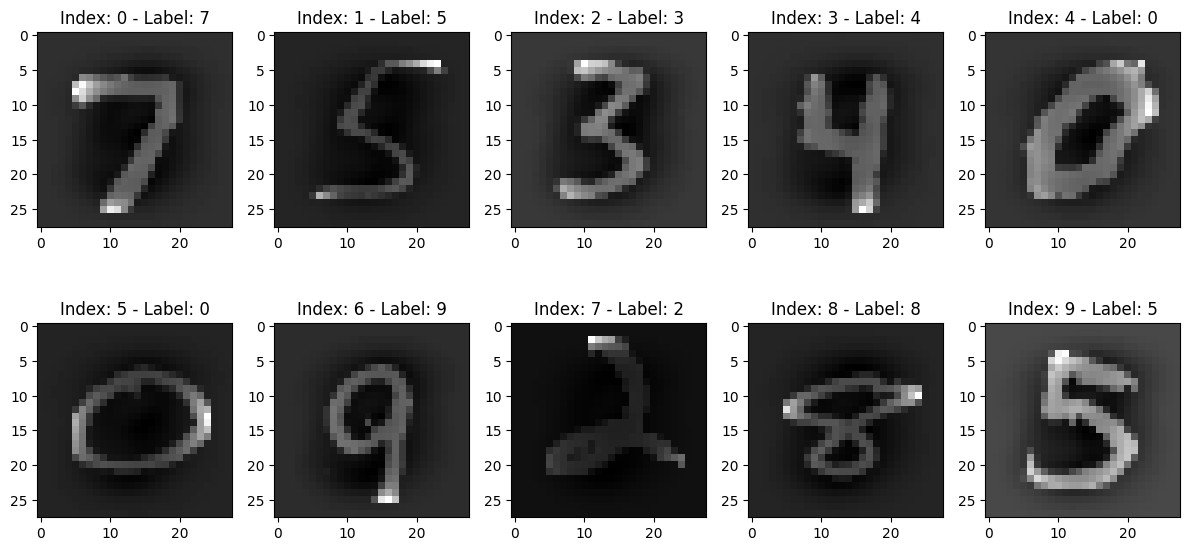

In [207]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Index: {i} - Label: {y_test[i][0]}')

plt.tight_layout()
plt.show()

In [208]:
#online learning example
layer_sizes = [784,40,10] 
activations = ['sigmoid','softmax']
nn = NeuralNetwork(layer_sizes, activations)

epochs = 10
learning_rate = 0.05
nn.train_online(X_train, y_train_encoded,X_test, y_test_encoded, epochs, learning_rate)

Epoch 1/10 - Loss: 0.3178
Epoch 2/10 - Loss: 0.2112
Epoch 3/10 - Loss: 0.1797
Epoch 4/10 - Loss: 0.1649
Epoch 5/10 - Loss: 0.1482
Epoch 6/10 - Loss: 0.1333
Epoch 7/10 - Loss: 0.1247
Epoch 8/10 - Loss: 0.1151
Epoch 9/10 - Loss: 0.1061
Epoch 10/10 - Loss: 0.1002
Training completed - Accuracy: 0.9321


In [209]:
nn.predict(X_test)[:10],y_test[:10].T

(array([7, 5, 3, 4, 0, 0, 9, 2, 8, 3], dtype=int64),
 array([[7, 5, 3, 4, 0, 0, 9, 2, 8, 5]], dtype=int64))

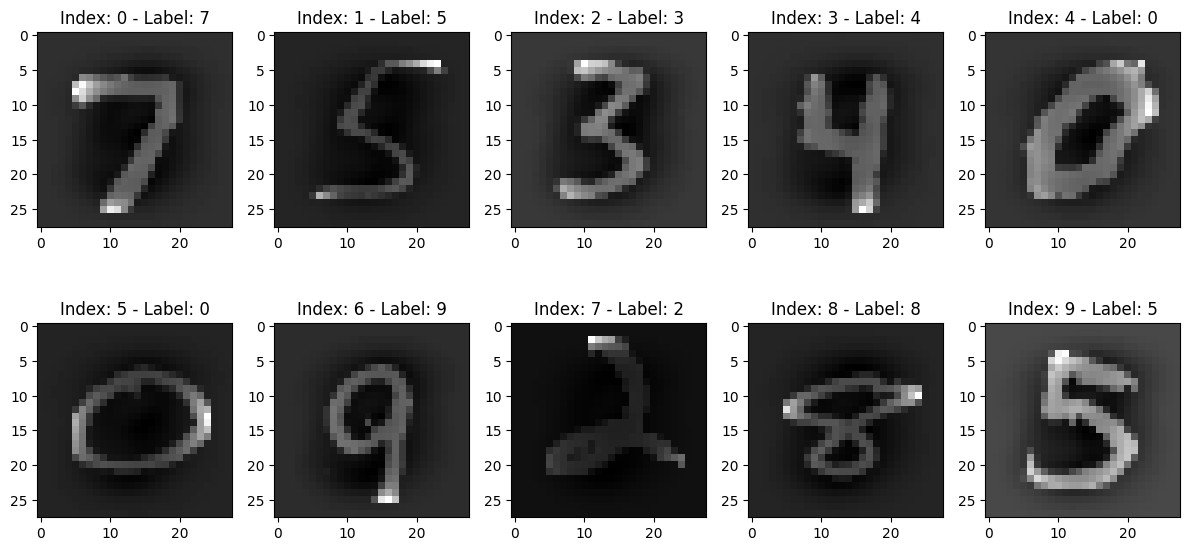

In [210]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Index: {i} - Label: {y_test[i][0]}')

plt.tight_layout()
plt.show()

In [198]:
# batch lerning example
layer_sizes = [784, 40, 10] 
activations = ['sigmoid','softmax']
nn = NeuralNetwork(layer_sizes, activations)

batch_size = 64
epochs = 100
learning_rate = 0.1
nn.train(X_train, y_train_encoded,X_test, y_test_encoded, epochs,learning_rate,batch_size)

Epoch 1/100 - Loss: 0.8876
Epoch 2/100 - Loss: 0.3327
Epoch 3/100 - Loss: 0.2675
Epoch 4/100 - Loss: 0.2341
Epoch 5/100 - Loss: 0.2116
Epoch 6/100 - Loss: 0.1943
Epoch 7/100 - Loss: 0.1805
Epoch 8/100 - Loss: 0.1686
Epoch 9/100 - Loss: 0.1587
Epoch 10/100 - Loss: 0.1499
Epoch 11/100 - Loss: 0.1420
Epoch 12/100 - Loss: 0.1348
Epoch 13/100 - Loss: 0.1286
Epoch 14/100 - Loss: 0.1227
Epoch 15/100 - Loss: 0.1175
Epoch 16/100 - Loss: 0.1126
Epoch 17/100 - Loss: 0.1080
Epoch 18/100 - Loss: 0.1040
Epoch 19/100 - Loss: 0.1001
Epoch 20/100 - Loss: 0.0964
Epoch 21/100 - Loss: 0.0932
Epoch 22/100 - Loss: 0.0899
Epoch 23/100 - Loss: 0.0868
Epoch 24/100 - Loss: 0.0841
Epoch 25/100 - Loss: 0.0813
Epoch 26/100 - Loss: 0.0787
Epoch 27/100 - Loss: 0.0765
Epoch 28/100 - Loss: 0.0741
Epoch 29/100 - Loss: 0.0720
Epoch 30/100 - Loss: 0.0699
Epoch 31/100 - Loss: 0.0678
Epoch 32/100 - Loss: 0.0660
Epoch 33/100 - Loss: 0.0641
Epoch 34/100 - Loss: 0.0624
Epoch 35/100 - Loss: 0.0606
Epoch 36/100 - Loss: 0.0591
E

In [199]:
nn.predict(X_test)[:10],y_test[:10].T

(array([9, 6, 4, 6, 9, 0, 6, 8, 4, 3], dtype=int64),
 array([[9, 8, 4, 6, 9, 0, 6, 8, 4, 3]], dtype=int64))

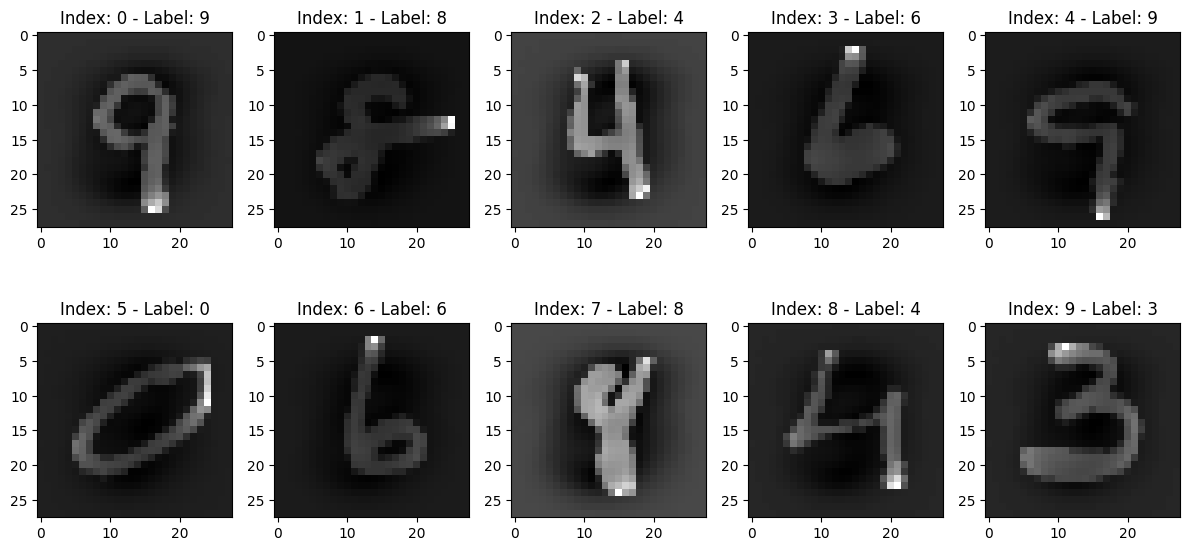

In [200]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Index: {i} - Label: {y_test[i][0]}')

plt.tight_layout()
plt.show()

In [201]:
#online learning example
layer_sizes = [784,40,10] 
activations = ['sigmoid','softmax']
nn = NeuralNetwork(layer_sizes, activations)

epochs = 100
learning_rate = 0.1
nn.train_online(X_train, y_train_encoded,X_test, y_test_encoded, epochs, learning_rate)

Epoch 1/100 - Loss: 0.4173
Epoch 2/100 - Loss: 0.3291
Epoch 3/100 - Loss: 0.2884
Epoch 4/100 - Loss: 0.2669
Epoch 5/100 - Loss: 0.2505
Epoch 6/100 - Loss: 0.2344
Epoch 7/100 - Loss: 0.2219
Epoch 8/100 - Loss: 0.2140
Epoch 9/100 - Loss: 0.2067
Epoch 10/100 - Loss: 0.2002
Epoch 11/100 - Loss: 0.1948
Epoch 12/100 - Loss: 0.1897
Epoch 13/100 - Loss: 0.1802
Epoch 14/100 - Loss: 0.1750
Epoch 15/100 - Loss: 0.1763
Epoch 16/100 - Loss: 0.1666
Epoch 17/100 - Loss: 0.1603
Epoch 18/100 - Loss: 0.1532
Epoch 19/100 - Loss: 0.1491
Epoch 20/100 - Loss: 0.1492
Epoch 21/100 - Loss: 0.1479
Epoch 22/100 - Loss: 0.1437
Epoch 23/100 - Loss: 0.1389
Epoch 24/100 - Loss: 0.1380
Epoch 25/100 - Loss: 0.1297
Epoch 26/100 - Loss: 0.1305
Epoch 27/100 - Loss: 0.1224
Epoch 28/100 - Loss: 0.1157
Epoch 29/100 - Loss: 0.1162
Epoch 30/100 - Loss: 0.1193
Epoch 31/100 - Loss: 0.1132
Epoch 32/100 - Loss: 0.1202
Epoch 33/100 - Loss: 0.1063
Epoch 34/100 - Loss: 0.1100
Epoch 35/100 - Loss: 0.1046
Epoch 36/100 - Loss: 0.1082
E

In [202]:
nn.predict(X_test)[:10],y_test[:10].T

(array([9, 8, 4, 6, 9, 0, 6, 8, 4, 3], dtype=int64),
 array([[9, 8, 4, 6, 9, 0, 6, 8, 4, 3]], dtype=int64))

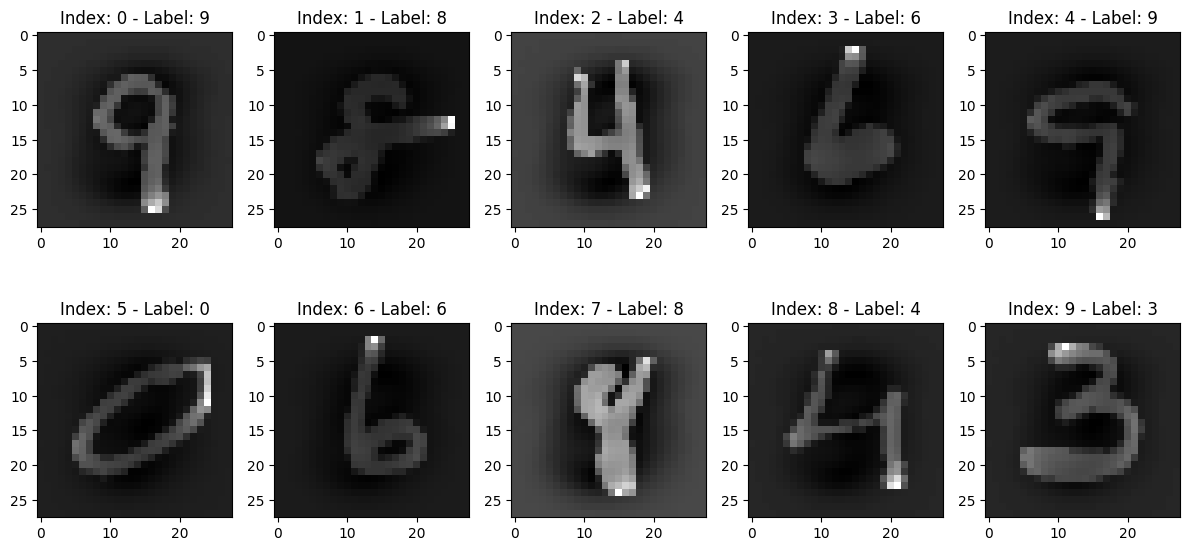

In [203]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Index: {i} - Label: {y_test[i][0]}')

plt.tight_layout()
plt.show()

In [176]:
# batch lerning example
layer_sizes = [784,392,196, 40, 10] 
activations = ['sigmoid','sigmoid','sigmoid','softmax']
nn = NeuralNetwork(layer_sizes, activations)

batch_size = 64
epochs = 10
learning_rate = 0.1
nn.train(X_train, y_train_encoded,X_test, y_test_encoded, epochs,learning_rate,batch_size)

Epoch 1/10 - Loss: 2.3087
Epoch 2/10 - Loss: 2.3027
Epoch 3/10 - Loss: 2.2818
Epoch 4/10 - Loss: 1.8218
Epoch 5/10 - Loss: 1.2422
Epoch 6/10 - Loss: 0.9571
Epoch 7/10 - Loss: 0.6693
Epoch 8/10 - Loss: 0.4598
Epoch 9/10 - Loss: 0.3706
Epoch 10/10 - Loss: 0.3229
Training completed - Accuracy: 0.9107


In [185]:
nn.predict(X_test)[:10],y_test[:10].T

(array([9, 5, 5, 0, 2, 5, 0, 7, 8, 3], dtype=int64),
 array([[9, 5, 5, 0, 2, 5, 0, 7, 1, 3]], dtype=int64))

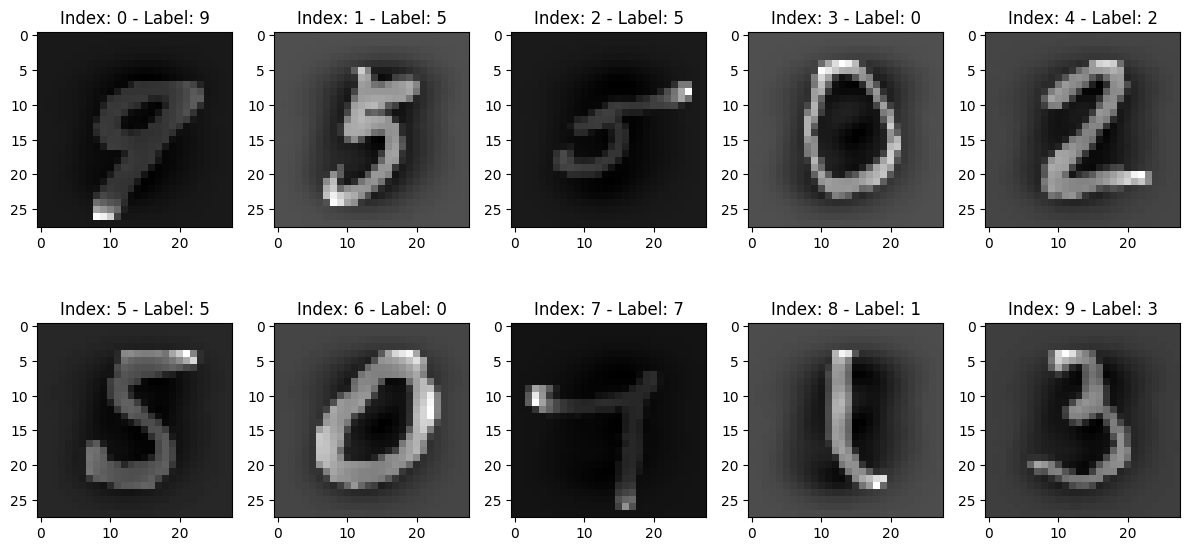

In [192]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Index: {i} - Label: {y_test[i][0]}')

plt.tight_layout()
plt.show()

In [194]:
#online learning example
layer_sizes = [784,392,196, 40, 10] 
activations = ['sigmoid','sigmoid','sigmoid','softmax']
nn = NeuralNetwork(layer_sizes, activations)

epochs = 10
learning_rate = 0.1
nn.train_online(X_train, y_train_encoded,X_test, y_test_encoded, epochs, learning_rate)

Epoch 1/10 - Loss: 0.6112
Epoch 2/10 - Loss: 0.1947
Epoch 3/10 - Loss: 0.1342
Epoch 4/10 - Loss: 0.1015
Epoch 5/10 - Loss: 0.0827
Epoch 6/10 - Loss: 0.0684
Epoch 7/10 - Loss: 0.0536
Epoch 8/10 - Loss: 0.0486
Epoch 9/10 - Loss: 0.0452
Epoch 10/10 - Loss: 0.0388
Training completed - Accuracy: 0.9596


In [195]:
nn.predict(X_test)[:10],y_test[:10].T

(array([9, 3, 5, 0, 2, 5, 0, 7, 1, 3], dtype=int64),
 array([[9, 5, 5, 0, 2, 5, 0, 7, 1, 3]], dtype=int64))

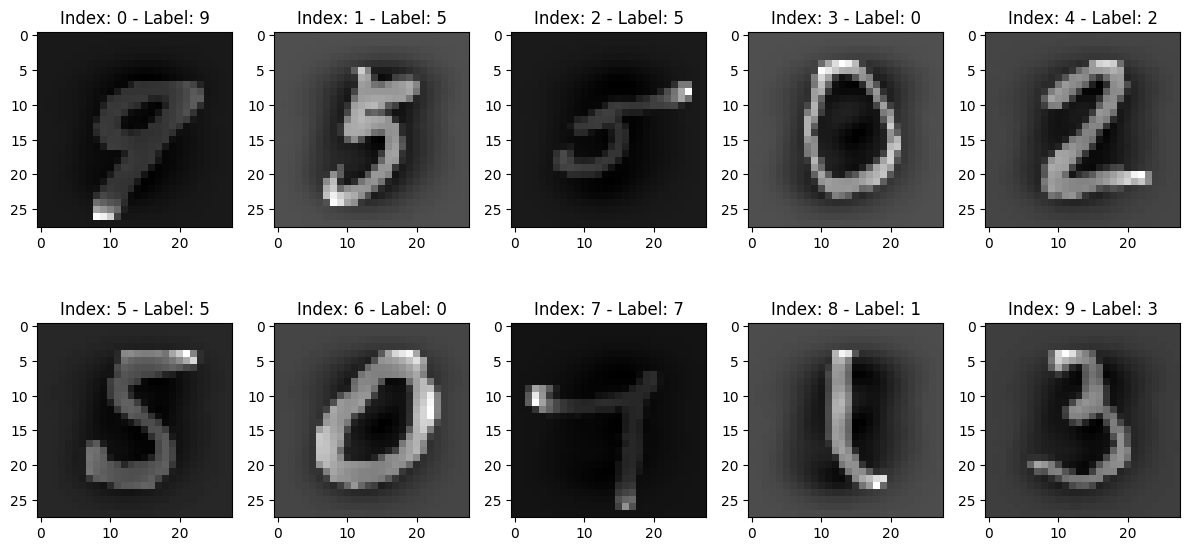

In [196]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Index: {i} - Label: {y_test[i][0]}')

plt.tight_layout()
plt.show()